El objetivo de este cuaderno es encontrar una buena función de distribución para el estadístico de Kolmogorov-Smirnov tal y como lo utilizo en mi tesois; este estadístico probablemente dependerá de los parámetro n y p de la binomial hipotéticamente subyacente, así como del número N de muestras aleatorias extraídas. 

In [1]:
import numpy as np
import scipy.stats as st
import scipy.optimize as opt
import matplotlib.pyplot as plt
from myutils.mystats import Dks_monte_carlo_discrete, fit_skewnorm

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', size=16, family='serif')
plt.rc('figure', autolayout=True) # Esto ayuda a que algunas figuras encajen mejor

In [12]:
def gen_data(N,n,p):
    """Esta función genera los N datos aleatorios y los devuelve como un 1darray
    """
    ## Generamos N valores binomiales
    # return st.binom.rvs(n=n,p=p,size=N)

    ## Generamos bitwords de 'n' bits, y devolvemos la suma:
    # result=[]
    # for i in range(N):
        # result.append(np.random.choice([0,1], size=n, p=[1-p,p]).sum())
    # return np.array(result)

    ## Calculamos la dist. primitiva esperada y la distancia de Hamming
    p_prim = 1/2-np.sqrt(1-2*p)/2
    set_prim = [np.random.choice([1,0],size=n,p=[p_prim,1-p_prim]) for i in range(N)]
    result=[]
    for i in range(N):
        for j in range(i+1,N,1):
            aux=0
            for k in range(n):
                if set_prim[i][k] != set_prim[j][k]:
                    aux+=1
            result.append(aux)
    return np.array(result)

# Análisis detallado paso a paso

## Definimos los hiperparámetros

In [ ]:
N = 100
n = 100
p = 0.07929443939330072

## Generamos los datos Dks

In [ ]:
Dks=[]
for t in range(1000):
    data = np.array([gen_data(N) for i in range(20)]).flatten()
    hist_data,_ = np.histogram(data, bins=n+1, range=(0,n), density=True) #np.unique(data,return_counts=True)
    
    Dks.append(np.max([np.abs(i-j) for i,j in zip(hist_data.cumsum(),st.binom.cdf(k=range(n+1),n=n,p=p))]))
    
    if (t+1)%100==0:
        print(f"{(t+1)/100:.0f} %",end='\r') # Número formateado a entero.

## Construimos el histograma

In [ ]:
#print(len(get_hist_smooth(Dks,p=0.9)[0]))
hist,bins = np.histogram(Dks, density=True, bins=15, range=(0,max(Dks)))

plt.bar(bins[:-1],hist, width=0.9*(bins[1]-bins[0]))
plt.show()

## Ajustamos el histograma a una curva normal sesgada

In [ ]:
a,loc,scale = opt.curve_fit(st.skewnorm.pdf, xdata=bins[:-1], ydata=hist, p0=[1,1,1])[0]
print(f"a:\t{a}\nloc:\t{loc}\nscale:\t{scale}")

plt.plot(np.linspace(bins[0],bins[-1],100),st.skewnorm.pdf(np.linspace(bins[0],bins[-1],100),a=a,loc=loc,scale=scale),color='C1')
plt.bar(bins[:-1],hist, width=0.9*(bins[1]-bins[0]),color='C0')
plt.show()

## Calculamos el intervalo de confianza (-inf,conf) para las significancias típicas

In [ ]:
alpha = [1-68/100, 1-95/100, 1-99/100] # Niveles de significancia típicos ("regla empírica").

def func(x,a,loc,scale,alpha):
    return st.skewnorm.cdf(x=x,a=a,loc=loc,scale=scale)-(1-alpha)

conf = [opt.root_scalar(func, args=(a,loc,scale,alpha), bracket=(bins[0],bins[-1]))['root'] for alpha in alpha]

plt.plot(np.linspace(bins[0],bins[-1],100),st.skewnorm.pdf(x=np.linspace(bins[0],bins[-1],100),a=a,loc=loc,scale=scale),color='C1', label="Interpolación",lw=3)
plt.bar(bins[:-1],hist, width=0.9*(bins[1]-bins[0]),color='C0', label="Simulación")
plt.annotate(text=f"$32 \%$", xy=(conf[0],0), xytext=(conf[0],0.95*max(hist)),
             arrowprops=dict(width=1,headwidth=0,color='grey'),color='grey')
plt.annotate(text=f"$5 \%$", xy=(conf[1],0), xytext=(conf[1],0.95*max(hist)),
             arrowprops=dict(width=1,headwidth=0,color='grey'),color='grey')
plt.annotate(text=f"$1 \%$", xy=(conf[2],0), xytext=(conf[2],0.95*max(hist)),
             arrowprops=dict(width=1,headwidth=0,color='grey'),color='grey')
plt.xlabel("Estadístico de Kolmogorov-Smirnov")
plt.ylabel("Probabilidad")
#plt.legend()
#plt.show()
plt.savefig("distribucion-dks.pdf",bbox_inches='tight')

print(f"N: {N}\nn: {n}\np: {p}\n")
print(f"alpha\tconf\n{alpha[0]:.2f}\t{conf[0]}\n{alpha[1]:.2f}\t{conf[1]}\n{alpha[2]:.2f}\t{conf[2]}\n----------------------------------")

## Calculamos el intervalo de confianza entorno a la media para las significancias típicas

In [ ]:
print(st.skewnorm.interval(0.68,a=a,loc=loc,scale=scale))
print(st.skewnorm.interval(0.95,a=a,loc=loc,scale=scale))
print(st.skewnorm.interval(0.99,a=a,loc=loc,scale=scale))

# Función para realizar la simulación de Monte-Carlo de Dks:

1/100
2/100
3/100
4/100
5/100
6/100
7/100
8/100
9/100
10/100
11/100
12/100
13/100
14/100
15/100
16/100
17/100
18/100
19/100
20/100
21/100
22/100
23/100
24/100
25/100
26/100
27/100
28/100
29/100
30/100
31/100
32/100
33/100
34/100
35/100
36/100
37/100
38/100
39/100
40/100
41/100
42/100
43/100
44/100
45/100
46/100
47/100
48/100
49/100
50/100
51/100
52/100
53/100
54/100
55/100
56/100
57/100
58/100
59/100
60/100
61/100
62/100
63/100
64/100
65/100
66/100
67/100
68/100
69/100
70/100
71/100
72/100
73/100
74/100
75/100
76/100
77/100
78/100
79/100
80/100
81/100
82/100
83/100
84/100
85/100
86/100
87/100
88/100
89/100
90/100
91/100
92/100
93/100
94/100
95/100
96/100
97/100
98/100
99/100
100/100


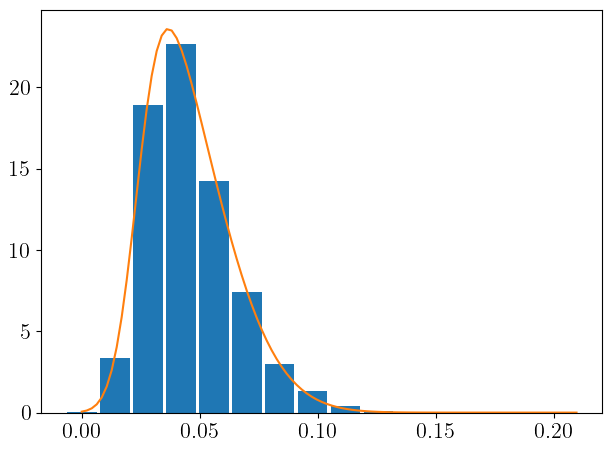

alpha	conf
0.32	0.05203228936281054
0.05	0.07953459102113587
0.01	0.09707676518010856
----------------------------------


In [16]:
Dks = []
for i in range(100):
    Dks += Dks_monte_carlo_discrete(model=gen_data, T=10000, N=20, fit=st.binom.pmf(k=range(101),n=100,p=0.5), n=100, p=0.5)
    print(f'{i+1}/100')

def _func(x,a,loc,scale,alpha):
    return st.skewnorm.cdf(x=x,a=a,loc=loc,scale=scale)-(1-alpha)
hist,bins = np.histogram(Dks, density=True, bins=15, range=(0,max(Dks)))

a,loc,scale = opt.curve_fit(st.skewnorm.pdf, xdata=bins[:-1], ydata=hist, p0=[1,1,1])[0]

plt.plot(np.linspace(bins[0],bins[-1],100),st.skewnorm.pdf(np.linspace(bins[0],bins[-1],100),a=a,loc=loc,scale=scale),color='C1')
plt.bar(bins[:-1],hist, width=0.9*(bins[1]-bins[0]),color='C0')
plt.show()
alpha = [1-68/100, 1-95/100, 1-99/100] # Niveles de significancia típicos ("regla empírica").

conf = [opt.root_scalar(_func, args=(a,loc,scale,alpha), bracket=(bins[0],bins[-1]))['root'] for alpha in alpha]
print(f"alpha\tconf\n{alpha[0]:.2f}\t{conf[0]}\n{alpha[1]:.2f}\t{conf[1]}\n{alpha[2]:.2f}\t{conf[2]}\n----------------------------------")

In [31]:
def fit_skewnorm(data, bins=10, alpha=False, plot=False):
    """Esta función ajusta una entrada de datos experimentales a una curva 'skew norm', que sirve de comodín para
    representar una densidad de probabilidad. Además, la función devuelve el 'valor p' para una cierta significancia
    'alpha' (típicamente utiizado en test de hipótesis alpha=0.05), y puede representar el plot correspondiente.
    
    :param data: Vector con los datos a ajustar.
    :type data: Lista de float.

    :param bins: Número de cajas para el histograma de `data`.
    :type bins: int, opcional.

    :param alpha: Valor de significancia 'alpha' para el cual se calcula el valor p, i.e., el valor tal que de p a infinito la proporción de área bajo la densidad es `alpha`.
    :type alpha: float, opcional.

    :param plot: Si `True` pinta el histograma y superpone la curva encontrada.
    :type plot: bool, opcional.

    :return: La función devuelve una lista que contiene los tres parámetros que ajustan la curva (a, loc, scale), y el histograma y bineado de los datos de entrada.
    """
    def _func(x,a,loc,scale,alpha):
        return st.skewnorm.cdf(x=x,a=a,loc=loc,scale=scale)-(1-alpha)
    hist,edges = np.histogram(data, density=True, bins=bins, range=(min(0,min(data)),max(data)))
    a,loc,scale = opt.curve_fit(st.skewnorm.pdf, xdata=edges[:-1], ydata=hist, p0=[1,1,1])[0]
   
    if alpha:
        p_val = opt.root_scalar(_func, args=(a,loc,scale,alpha), bracket=(edges[0],edges[-1]))['root']
        print(f"alpha: {alpha} --> p val: {p_val}")

    if plot:
        plt.plot(np.linspace(edges[0],edges[-1],100),st.skewnorm.pdf(x=np.linspace(edges[0],edges[-1],100),a=a,loc=loc,scale=scale),color='C1', label="Interpolación",lw=3)
        plt.bar(edges[:-1],hist, width=0.9*(edges[1]-edges[0]),color='C0', label="Simulación")
        if alpha:
            plt.annotate(text=f"${alpha*100:.0f} \%$", xy=(p_val,0), xytext=(p_val,0.95*max(hist)),
                         arrowprops=dict(width=1,headwidth=0,color='grey'),color='grey')
        plt.show()

    return a,loc,scale,hist,edges

In [21]:
np.savetxt('Dks_N20_n100_p0.5.txt', Dks)

In [2]:
Dks_bis = np.loadtxt('Dks_N20_n100_p0.5.txt')

alpha: 0.05 --> p val: 0.07953459102113587


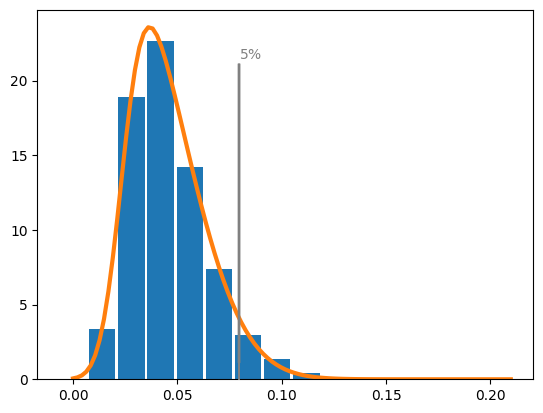

In [3]:
a = fit_skewnorm(Dks_bis, bins=15, alpha=0.05, plot=True)